# Decision Tree Classification

## Conceptual Questions

1. What is a Decision Tree Classifier and how does it make decisions?

A. **Decision Tree Classifier:** A model that splits data into branches based on feature values until reaching a class label.

2. What does a split criterion mean?

A. **Split criterion:** A measure (like Gini or Entropy) that decides the best feature to split on.

3. Difference between Gini Impurity and Entropy.

A. **Gini vs Entropy:** Gini is faster and measures misclassification probability; Entropy measures information disorder.

4. Why do Decision Trees overfit?

A. **Overfitting:** Trees grow too deep, capturing noise and reducing generalization.

5. What role does max_depth play?

A. **max_depth:** Limits tree growth to prevent overfitting by controlling complexity.

6. What is bias vs variance in classification?

A. **Bias vs Variance:** Bias is error from oversimplification (underfitting); variance is error from sensitivity to data (overfitting).

## Data Explorations

In [2]:
import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [11]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [14]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

## Data Preprocessing

In [17]:
# Handle missing values

df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

C:\Users\veera\AppData\Local\Temp\ipykernel_1796\2624631227.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)


In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
# Encode categorical values
df = pd.get_dummies(df, columns = ['Sex','Embarked'], drop_first = True)

In [21]:
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [22]:
# Separate features and target

X = df.drop('Survived', axis = 1)
y = df['Survived']

In [23]:
# train and test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Model Building

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'gini', random_state = 42)

# Train the model on training data

train_trans = model.fit(X_train, y_train)
train_trans

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [27]:
# Predict on test data
y_pred = model.predict(X_test)

## Model Evaluation

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Classification report:", classification_report(y_test, y_pred))

print("1. survivad(class 0) is better than survived(class 1)")
print("2. overall accuracy is good")

Accuracy: 0.7821229050279329
Confusion matrix: [[84 21]
 [18 56]]
Classification report:               precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179

1. survivad(class 0) is better than survived(class 1)
2. overall accuracy is good


## Tree Depth Experiment

In [34]:
depths = [2, 5, None]
for d in depths:
    model = DecisionTreeClassifier(max_depth = d, random_state = 42)
    model.fit(X_train, y_train)
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    train_acc = accuracy_score(y_train, train_predict)
    test_acc = accuracy_score(y_test, test_predict)

    print(f"Depth = {d}, Train Acc = {train_acc:.3f}, Test Acc = {test_acc:.3f}")


print("Depth = 2: Too simple, cannot capture complexity ---> underfitting")
print("Depth = 5: strong generalization ---> best balance")
print("Depth = None: Memorizing training data, loses generalization ---> overfitting")

Depth = 2, Train Acc = 0.803, Test Acc = 0.765
Depth = 5, Train Acc = 0.851, Test Acc = 0.799
Depth = None, Train Acc = 0.979, Test Acc = 0.782
Depth = 2: Too simple, cannot capture complexity ---> underfitting
Depth = 5: strong generalization ---> best balance
Depth = None: Memorizing training data, loses generalization ---> overfitting


# Tree Visualization

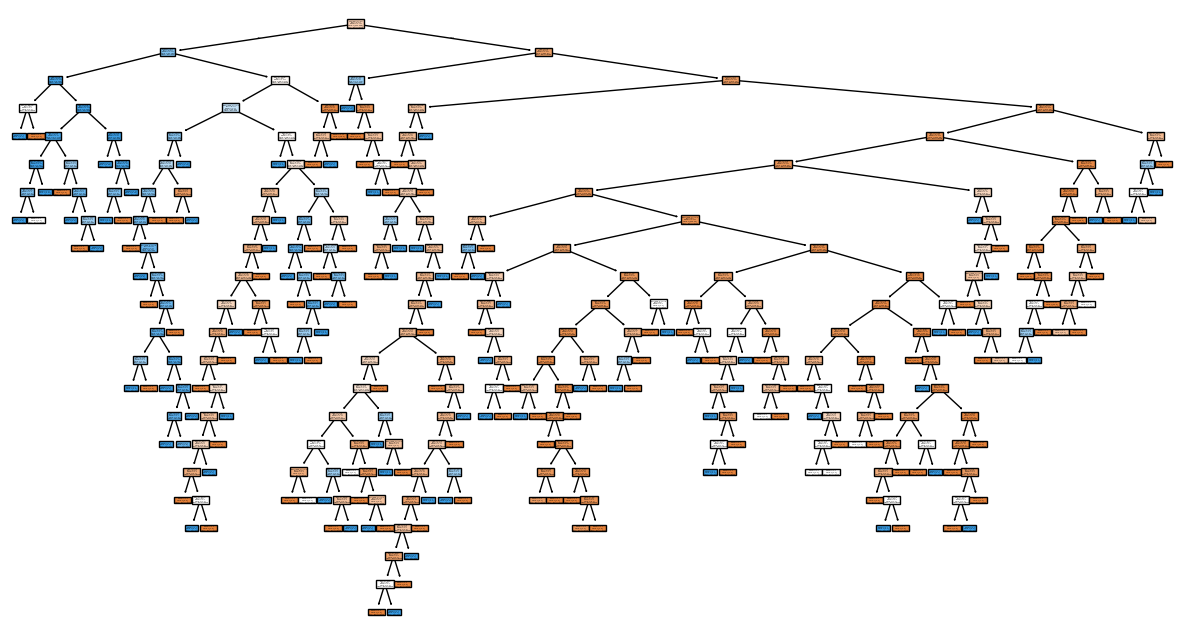

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
plot_tree(model, feature_names = X.columns, class_names = ['Not Survived', 'Survived'], filled = True)
plt.show()

## Hyperparameter Comparison

In [32]:
## Gini vs Entropy

dt_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
gini_train_trans = dt_gini.fit(X_train, y_train)
dt_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
entropy_train_trans = dt_entropy.fit(X_train, y_train)

gini_predict = dt_gini.predict(X_test)
entropy_predict = dt_entropy.predict(X_test)

print("Gini Test Accuracy:", accuracy_score(y_test, gini_predict))
print("Entropy Test Accuracy:", accuracy_score(y_test, entropy_predict))

Gini Test Accuracy: 0.7821229050279329
Entropy Test Accuracy: 0.7932960893854749


In [33]:
## min_samples_leaf

dt_leaf = DecisionTreeClassifier(min_samples_leaf = 5, random_state = 42)
leaf_train_trans = dt_leaf.fit(X_train, y_train)

leaf_pred = dt_leaf.predict(X_test) 
print("Leaf test accuracy:", accuracy_score(y_test, leaf_pred))

Leaf test accuracy: 0.8379888268156425


## Reflection Questions

## Conclusion

1. Overfitting occurs deep trees.
2. max_depth is critical for generalization.
3. Hyperparameter tuning improves performance.
4. Decision Trees are best when interpretability matters or as base models in ensembles.